# Data preparation

Importing data. Useful cheatsheet : https://www.datacamp.com/community/blog/importing-data-python-cheat-sheet

### Working with text files : import txt, output txt, json file line by line, etc..

We shall use as an example the address speech of Melania Trump on the Republican National Convention. Available from many sources, for example: https://www.news24.com/World/News/read-what-melania-trump-said-20160719 

You can input the whole chuck of a text into memory.

In [2]:
txt_filename = "./data/Melania_Trump.txt"

text = []
with open(txt_filename, "r") as input_f:
    text = input_f.read()
        
text[:100]

'Thank you very much. Thank you. You have all been very kind to Donald and me, to our young son Barro'

In order to analyse the text by paragraphs, we need to single them out. 

In [3]:
paragraphs = text.split("\n")
paragraphs[0]

"Thank you very much. Thank you. You have all been very kind to Donald and me, to our young son Barron, and to our whole family. It’s a very nice welcome and we're excited to be with you at this historic convention. I am so proud of your choice for president of the United States, my husband, Donald J. Trump."

Input of the text file can be done via importing the text line by line, where line is a chuck of text ending with the "enter" sign `\n`. 

In [4]:
txt_filename = "./data/Melania_Trump.txt"

text = []
with open(txt_filename, "r") as input_f:
    for line in input_f:
        text.append(line)
text[0]

"Thank you very much. Thank you. You have all been very kind to Donald and me, to our young son Barron, and to our whole family. It’s a very nice welcome and we're excited to be with you at this historic convention. I am so proud of your choice for president of the United States, my husband, Donald J. Trump.\n"

However, extracting sentences is not straightforward.

In [5]:
txt_filename = "./data/Melania_Trump.txt"

text = []
with open(txt_filename, "r") as input_f:
    text = input_f.read()

sentences = text.split(". ")
print('\n-----\n'.join(sentences[:10]))

Thank you very much
-----
Thank you
-----
You have all been very kind to Donald and me, to our young son Barron, and to our whole family
-----
It’s a very nice welcome and we're excited to be with you at this historic convention
-----
I am so proud of your choice for president of the United States, my husband, Donald J
-----
Trump.

And I can assure you, he is moved by this great honor
-----
The 2016 Republican primaries were fierce and started with many candidates, 17 to be exact, and I know that Donald agrees with me when I mention how talented all of them are
-----
They deserve respect and gratitude from all of us.

However, when it comes to my husband, I will say that I am definitely biased, and for good reason.

I have been with Donald for 18 years and I have been aware of his love for this country since we first met
-----
He never had a hidden agenda when it comes to his patriotism, because, like me, he loves this country so much
-----
I was born in Slovenia, a small, beautiful a

## Powerful tool to work with text: `nltk` module https://www.nltk.org.

Use it now to extract sentences from text.

Install command from terminal `conda install -c anaconda nltk`

In [6]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/amedvede/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
txt_filename = "./data/Melania_Trump.txt"

text = []
with open(txt_filename, "r") as input_f:
    text = input_f.read()
        
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [8]:
sentences = sent_detector.tokenize(text.strip())
print('\n-----\n'.join(sentences[:10]))

Thank you very much.
-----
Thank you.
-----
You have all been very kind to Donald and me, to our young son Barron, and to our whole family.
-----
It’s a very nice welcome and we're excited to be with you at this historic convention.
-----
I am so proud of your choice for president of the United States, my husband, Donald J. Trump.
-----
And I can assure you, he is moved by this great honor.
-----
The 2016 Republican primaries were fierce and started with many candidates, 17 to be exact, and I know that Donald agrees with me when I mention how talented all of them are.
-----
They deserve respect and gratitude from all of us.
-----
However, when it comes to my husband, I will say that I am definitely biased, and for good reason.
-----
I have been with Donald for 18 years and I have been aware of his love for this country since we first met.


### Working with str data: regex, string functions

Regular expressions help to find meaningful patterns in text data. It is however rather complicated to grasp. See documentation https://docs.python.org/3/library/re.html

Below we use the regex to search for proper names in the sentence.

In [9]:
import re 

s = sentences[2]
re.findall("(?<!^)(?<!\. )[A-Z][a-z]+", s)

['Donald', 'Barron']

In [10]:
print(s.split(" "))

['You', 'have', 'all', 'been', 'very', 'kind', 'to', 'Donald', 'and', 'me,', 'to', 'our', 'young', 'son', 'Barron,', 'and', 'to', 'our', 'whole', 'family.']


Strings can be split, formatted, joined.. More info in the docs:  https://docs.python.org/3.7/library/string.html

In [14]:
"I am {} years old, sell me that {} please".format(18, "phone")
s = "feefwe"
f"I am {18} years old, sell me that {s} please"

'I am 18 years old, sell me that feefwe please'

In [ ]:
just_words = ['You', 'have', 'all', 'been', 'very', 'kind', 'to', 'Donald', 
              'and', 'me', 'to', 'our', 'young', 'son', 'Barron', 'and', 
              'to', 'our', 'whole', 'family.']
"-".join(just_words)

***

# Table data (csv) and Pandas dataframes

Reddit database of all posts and comments is available here: https://files.pushshift.io/reddit/. Here we use a preprocessed version of posts from Feb 2008 saved as a .csv file.

Databases : pandas - access a row, item, column, for loop, filtering, a

In [15]:
import pandas as pd
pd_file = "./data/reddit_posts_02_2008.csv"

In [16]:
# Import the csv file into the pandas DataFrame
reddit_posts_df = pd.read_csv(pd_file, index_col = 0, 
                              parse_dates=['created_utc'])
reddit_posts_df[:5]

,created_utc,author,num_comments,ups,downs,title
0,2008-02-02 04:58:53,plun9,0,3,2,Dining In The Dark
1,2008-02-02 04:58:20,bookmarksonline,1,1,1,Webhost Hostgator
2,2008-02-02 04:56:45,andhika,1,1,0,Dream Interpretation
3,2008-02-02 04:55:53,akilmartin,0,1,1,Turn Your Cap Backwards and Let Your Butt-Crac...
4,2008-02-02 04:55:29,ScrewDriver,0,5,0,Those Disgusting Tapeworms


In [17]:
# sort by a column
reddit_posts_df = reddit_posts_df.sort_values("created_utc")
reddit_posts_df[:5]

,created_utc,author,num_comments,ups,downs,title
4194,2008-02-01 05:00:30,jimgagnon,0,1,2,New Evidence Emerges in Natalee Holloway Case ...
4193,2008-02-01 05:01:11,tulwave,0,1,1,Britney's Mum Speaks Out About Family Troubles
4192,2008-02-01 05:02:46,orlando37,1,1,1,Get in her pants : Start Manscraping
4191,2008-02-01 05:03:37,rdbb,0,1,0,Worlds Best Taco Shop Style Hot Sauce
4190,2008-02-01 05:03:39,fashiononline,1,1,1,Twinkle Toes Kolhapuri Footwear


In [18]:
# reset index of the DataFrame
reddit_posts_df.reset_index(inplace= True, drop = True)
reddit_posts_df[:5]

,created_utc,author,num_comments,ups,downs,title
0,2008-02-01 05:00:30,jimgagnon,0,1,2,New Evidence Emerges in Natalee Holloway Case ...
1,2008-02-01 05:01:11,tulwave,0,1,1,Britney's Mum Speaks Out About Family Troubles
2,2008-02-01 05:02:46,orlando37,1,1,1,Get in her pants : Start Manscraping
3,2008-02-01 05:03:37,rdbb,0,1,0,Worlds Best Taco Shop Style Hot Sauce
4,2008-02-01 05:03:39,fashiononline,1,1,1,Twinkle Toes Kolhapuri Footwear


In [19]:
# filter by the column
reddit_posts_df[reddit_posts_df["num_comments"]>100][:5]

,created_utc,author,num_comments,ups,downs,title
17,2008-02-01 05:09:09,xelfer,186,1115,457,xkcd: Real Programmers
427,2008-02-01 07:56:44,UncleOxidant,155,447,119,"Simply put, the U.S. banking system has no res..."
813,2008-02-01 10:41:56,shivermetimberslads,437,1151,565,"1 Girl, 6 Soldiers [pic]"
901,2008-02-01 11:12:14,antirez,110,73,51,Ask reddit: how do you handle out of memory co...
938,2008-02-01 11:26:43,prestigearticle,112,333,139,Female suicide bombers kill dozens in Baghdad ...


In [20]:
# drop missing values
reddit_posts_df.dropna()
reddit_posts_df[:5]

,created_utc,author,num_comments,ups,downs,title
0,2008-02-01 05:00:30,jimgagnon,0,1,2,New Evidence Emerges in Natalee Holloway Case ...
1,2008-02-01 05:01:11,tulwave,0,1,1,Britney's Mum Speaks Out About Family Troubles
2,2008-02-01 05:02:46,orlando37,1,1,1,Get in her pants : Start Manscraping
3,2008-02-01 05:03:37,rdbb,0,1,0,Worlds Best Taco Shop Style Hot Sauce
4,2008-02-01 05:03:39,fashiononline,1,1,1,Twinkle Toes Kolhapuri Footwear


In [21]:
# drop duplicates
reddit_posts_df.drop_duplicates()
reddit_posts_df[:5]

,created_utc,author,num_comments,ups,downs,title
0,2008-02-01 05:00:30,jimgagnon,0,1,2,New Evidence Emerges in Natalee Holloway Case ...
1,2008-02-01 05:01:11,tulwave,0,1,1,Britney's Mum Speaks Out About Family Troubles
2,2008-02-01 05:02:46,orlando37,1,1,1,Get in her pants : Start Manscraping
3,2008-02-01 05:03:37,rdbb,0,1,0,Worlds Best Taco Shop Style Hot Sauce
4,2008-02-01 05:03:39,fashiononline,1,1,1,Twinkle Toes Kolhapuri Footwear


In [22]:
# add a new row to the DataFrame
from datetime import datetime

new_post = {'created_utc': datetime(2008, 2, 2, 4, 56, 20), 
            'author': 'ppgana', 
            'num_comments': 0, 'ups': 3, 'downs': 4, 
            'title': "Seven Stills from Rob Zombie's Animated Film"}

reddit_posts_df = reddit_posts_df.append(new_post,ignore_index=True)
reddit_posts_df[-3:]

,created_utc,author,num_comments,ups,downs,title
121722,2008-03-01 04:59:04,LeonG,0,1,1,Compensation mode = excessive pay
121723,2008-03-01 04:59:26,sanjana_negi05,0,1,1,Is Sex During Pregnancy Safe?:Sex During Pregn...
121724,2008-02-02 04:56:20,ppgana,0,3,4,Seven Stills from Rob Zombie's Animated Film


Many more filtering and operating with the DataFrames: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Below we show how to iterate over the rows and extract the information from the table. Let us compare the title length and the appreciation of the post.

In [23]:
appreciation_length_title = []
for index, row in reddit_posts_df.iterrows():
    appreciation_length_title.append((len(row["title"]), row["ups"]))

In [ ]:
# alternative way (one-liner)
appreciation_length_title = [(len(row["title"]), row["ups"]) 
                             for index, row in reddit_posts_df.iterrows()]

# Visualisation

Here we consider only the most wide used plotting module: `matplotlib`. There are of course more plotting modules which offer fancier plots : `seaborn`, `bokeh`, `plotly`, etc.

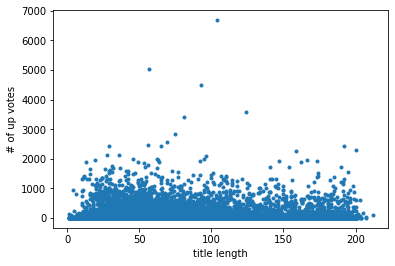

In [25]:
import matplotlib.pyplot as plt

plt.scatter(*zip(*appreciation_length_title), marker = ".")
plt.xlabel("title length")
plt.ylabel("# of up votes")
plt.show()

Not really informative. Then, let's try to compare the number of upvotes and downvotes.

In [26]:
downs_ups = [(row["downs"], row["ups"]) for index, row in reddit_posts_df.iterrows()]

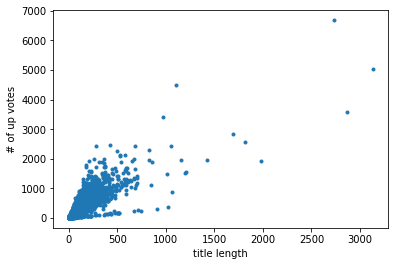

In [27]:
fig = plt.figure(figsize = (6,4))
plt.scatter(*zip(*downs_ups), marker = ".")
# plt.xlim([-100,1200])
# plt.ylim([-100,1200])
plt.xlabel("down votes")
plt.ylabel("# of up votes")
plt.show()

Let us plot a histogram of upvotes.

In [28]:
_, ups = zip(*downs_ups)

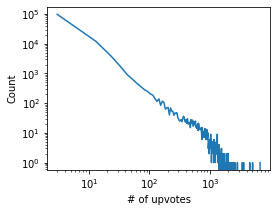

In [30]:
import numpy as np

b_width = 10
bins = np.arange(min(ups), max(ups)+b_width, b_width)
hist, bins = np.histogram(ups, bins = bins)
center_bins = [l+b_width/2 for l in bins[:-1]]

fig = plt.figure(figsize=(4,3))
plt.plot(center_bins, hist)
plt.xlabel("# of upvotes")
plt.ylabel("Count")
plt.xscale('log')
plt.yscale('log')
plt.show()

Saving the plots is easy:

In [31]:
plot_file = "./histogram.pdf"
fig.savefig(plot_file, facecolor='w', edgecolor='w', format='pdf',
        bbox_inches='tight', pad_inches=0)

More info on plotting funtions can be found here: https://matplotlib.org/3.1.1/index.html

# Import JSON strings

Another important data type is JSON string. These strings basically resemble dictionaries. More info : https://docs.python.org/3.7/library/json.html

In [32]:
import json

reddit_json_file = "./data/reddit_chunk.json"
posts = []
with open(reddit_json_file, "r") as input_f:
    for line in input_f:
        posts.append(json.loads(line))

one_post = posts[-1]
type(one_post)

dict

One helpful feature from `json` module is the formatted output of the dictionary.

In [33]:
print(json.dumps(one_post, indent = 2, sort_keys = True))

{
  "approved_by": null,
  "author": "drazhardaud",
  "author_flair_css_class": null,
  "author_flair_text": null,
  "banned_by": null,
  "clicked": false,
  "created": 1201927796,
  "created_utc": 1201927796,
  "distinguished": null,
  "domain": "geniusiq-drazhardaud.blogspot.com",
  "downs": 1,
  "edited": false,
  "hidden": false,
  "id": "67fb2",
  "is_self": false,
  "likes": null,
  "link_flair_css_class": null,
  "link_flair_text": null,
  "media": null,
  "media_embed": {},
  "name": "t3_67fb2",
  "num_comments": 0,
  "num_reports": null,
  "over_18": false,
  "permalink": "/r/reddit.com/comments/67fb2/genius_iq_genius_iq_genius_iq_genius_iq_in/",
  "saved": false,
  "score": 0,
  "selftext": "",
  "selftext_html": null,
  "subreddit": "reddit.com",
  "subreddit_id": "t5_6",
  "thumbnail": "default",
  "title": "Genius IQ Genius IQ Genius IQ: Genius IQ in Believing Is Seeing",
  "ups": 1,
  "url": "http://geniusiq-drazhardaud.blogspot.com/2008/02/genius-iq-in-believing-is-seein

***

# Networks

We glance over the `networkx` module : https://networkx.github.io/documentation/stable/. This module is the easiest and very powerful when working with not too large networks. Of course, there exist other modules for manipulation with networks: `igraph` https://igraph.org/python/, `graph-tool` https://graph-tool.skewed.de/, etc.

In [34]:
# Networks : networkx - what is a graph (internal representation), access nodes, edges, properties, algorithms
import networkx as nx

Define a network

In [35]:
G = nx.Graph()

Add nodes and edges:

In [36]:
G.add_node(1, size = 1)
G.add_nodes_from([2,3,4], size = [2,3,4])

G.add_edge(1,2, weight = 1)
G.add_edges_from([(2,3), (2,4), (1,4)], weight = [2,3,4])

Show the information about the graph:

In [37]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


Access node and edge attributes:

In [38]:
print("node size:", G.node[1]["size"])
print("edge weight:", G[1][2]["weight"])

node size: 1
edge weight: 1


Iterate over the nodes and edges:

In [39]:
# nodes
for u in G.nodes():
    print(u, end = " ")
print("\n------")
# edges
for u,v in G.edges():
    print("{}-{}".format(u,v), end=" --> ")

1 2 3 4 
------
1-2 --> 1-4 --> 2-3 --> 2-4 --> 

Remove nodes and edges from a graph

In [40]:
edges_to_remove = [(1,2), (3,4)]
G.remove_edges_from(edges_to_remove)
print(nx.info(G))
print("-------------------------")
nodes_to_remove = [1,2]
G.remove_nodes_from(nodes_to_remove)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 3
Average degree:   1.5000
-------------------------
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 0
Average degree:   0.0000


## Fancy networks

There are one liners for generating networks from various models.

In [43]:
ER = nx.erdos_renyi_graph(100, 0.05)
print(nx.info(ER))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 238
Average degree:   4.7600


Draw network

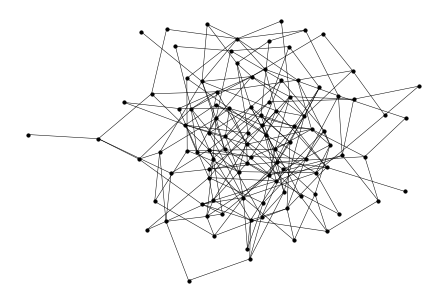

In [44]:
import warnings
warnings.filterwarnings("ignore")

g_draw = ER

fig = plt.figure(figsize=(6,4))

pos = nx.spring_layout(g_draw)
nx.draw(g_draw, pos, node_color='black', node_size=10, width=0.5)
plt.show()

# plot_file = "./graph_file.pdf"
# fig.savefig(plot_file, facecolor='w', edgecolor='w', format='pdf',
#         bbox_inches='tight', pad_inches=0)

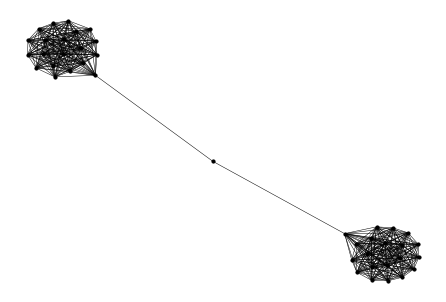

In [45]:
g_draw = nx.barbell_graph(20, 1)

fig = plt.figure(figsize=(6,4))
pos = nx.spring_layout(g_draw)
nx.draw(g_draw, pos, node_color='black', node_size=10, width=0.5)
plt.show()

Predefined algorithms for network analysis:

In [46]:
n = 10000
ER = nx.erdos_renyi_graph(n, 2/n)
# print("Sizes of connected components:", [len(x) for x in list(nx.connected_components(ER))])

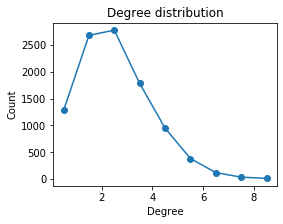

In [47]:
degrees = [ER.degree(u) for u in ER.nodes()]

b_width = 1
bins = np.arange(min(degrees), max(degrees)+b_width, b_width)
hist, bins = np.histogram(degrees, bins = bins)
center_bins = [l+b_width/2 for l in bins[:-1]]

fig = plt.figure(figsize=(4,3))
plt.plot(center_bins, hist, marker = "o")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution")
# plt.xscale('log')
# plt.yscale('log')
plt.show()

More info in the documentation: https://networkx.github.io/documentation/stable/reference/index.html